# Experimentation with the Black-Scholes-Merton model

First, we write the formula for the price of a Call and Put in the Black-Scholes-Merton model.

$$
\begin{align*}
d_1 &= \dfrac{\ln(S/K) + (r + \sigma^2/2)T}{\sigma \sqrt{T}} \\
d_2 &= d_1 - \sigma \sqrt{T} \\ 
\end{align*}
$$

Even though the BSM model assumes volatility and the risk free rate to be constant, we will still write the price of the option as a function of these parameters.


$$
\begin{align*}
C(S,K,T,\sigma,r) &= S\Phi(d_1) - Ke^{-rT}\Phi(d_2)\\
P(S,K,T,\sigma,r) &=  Ke^{-rT}\Phi(-d_2) - S\Phi(-d_1)
\end{align*}
$$

Then we could find all the greeks by taking partial derivatives.

Delta $\delta$:
$$
\begin{align*}
\dfrac{\partial C}{\partial S} &= \Phi(d_1) \\
\dfrac{\partial P}{\partial S} &= 1 - \Phi(d_1)
\end{align*}
$$

Gamma $\gamma$:
$$
\dfrac{\partial ^2C}{\partial S^2} = \dfrac{\partial^2P}{\partial S^2} 
= \dfrac{\phi(d_1)}{S\sigma\sqrt{T}}
$$

Theta $\theta$:
$$
\begin{align*}
-\dfrac{\partial C}{\partial t} &= -\dfrac{S\phi(d_1)\sigma}{2\sqrt{T}} - rKe^{-rT}\Phi(d_2)\\
-\dfrac{\partial P}{\partial t} &= -\dfrac{S\phi(d_1)\sigma}{2\sqrt{T}}+ rKe^{-rT}\Phi(-d_2)
\end{align*}
$$

Rho $\rho$:
$$
\begin{align*}
\dfrac{\partial C}{\partial r} &= KTe^{-rT}\Phi(d_2) \\
\dfrac{\partial P}{\partial r} &= -KTe^{-rT}\Phi(-d_2) \\
\end{align*}
$$

Vega (not actually a greek):
$$
\dfrac{\partial C}{\partial \sigma} = \dfrac{\partial P}{\partial \sigma} = S \phi(d_1)\sqrt{T}
$$

The variance of vega, known as kappa $\kappa$, is not a main greek, but we will do some work with it. It is given as follows:

Kappa $\kappa$:
$$
\dfrac{\partial ^2C}{\partial \sigma^2} = \dfrac{\partial^2P}{\partial \sigma^2} 
= \dfrac{S\sqrt{T}\phi(d_1)}{2\sigma}
$$


## Section 1: Changes in the Option price when parameters change

Here we seek to do basic plotting of option prices and the greeks to gain some intuition.

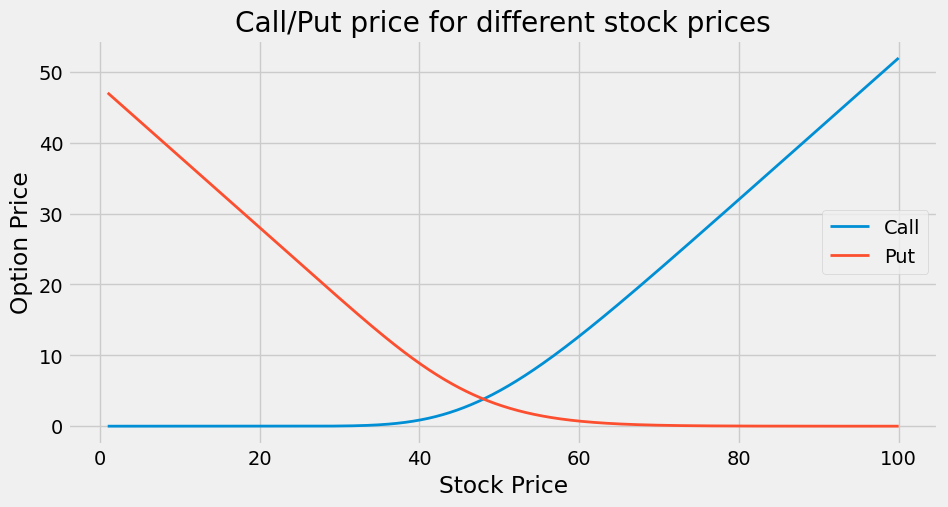

In [2]:
import black_scholes as bs
import numpy as np
import matplotlib.pyplot as plt

# Generate data for a theoretical stock
S = 50
K = 50
T = 1
vol = 0.2
r = 0.04

x_axis = np.linspace(1,100,1000)

# Plot the price of a call and a put
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.title("Call/Put price for different stock prices")
plt.xlabel("Stock Price")
plt.ylabel("Option Price")
plt.plot(x_axis, bs.call_price(x_axis, K, T, vol, r), label="Call", linewidth=2)
plt.plot(x_axis, bs.put_price(x_axis, K, T, vol, r), label="Put", linewidth=2) 
plt.legend()

plt.show()


### What happends when T changes?

We will investigate what happends when we change each of the parameters. Since changing the strike is uninteresting, we begin by changing the time to experation.

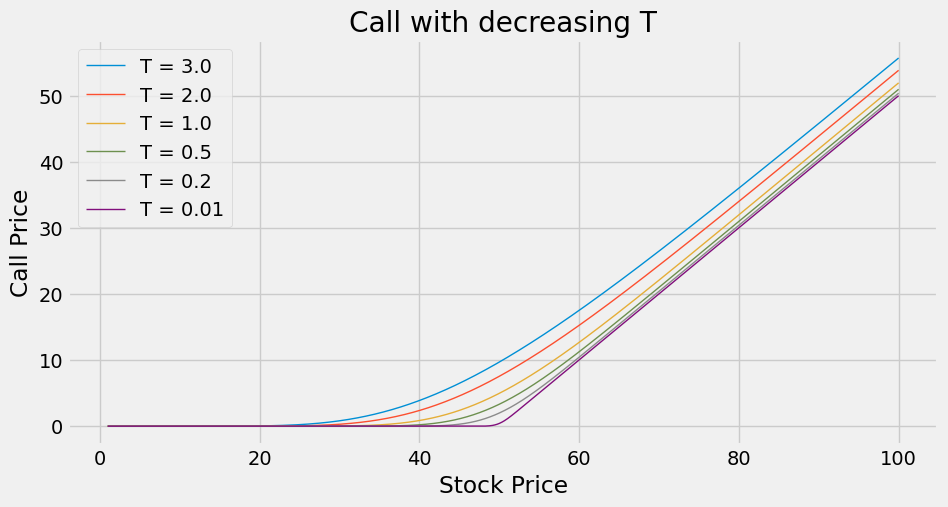

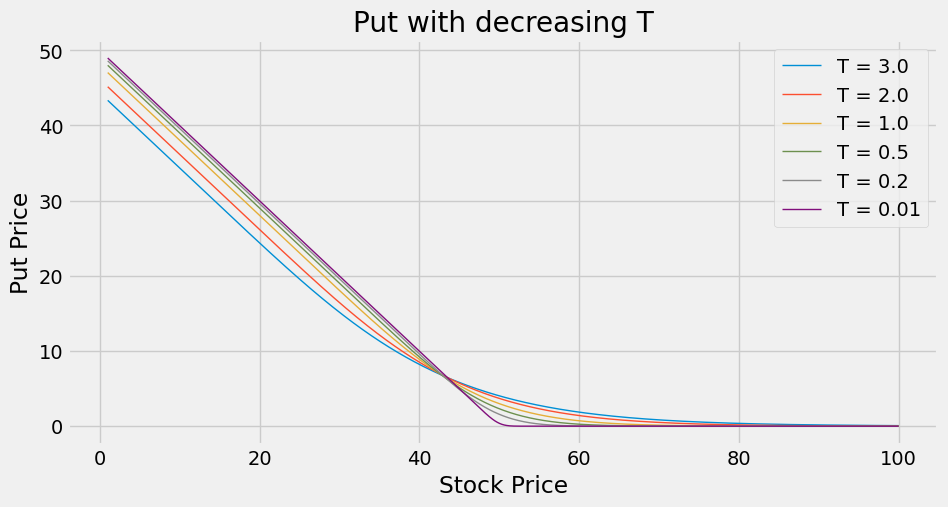

In [3]:
Tenors = np.array([3,2,1,0.5,0.2,0.01])

# Plot the call price for each of the given tenors
plt.figure(figsize=(10,5))
plt.title('Call with decreasing T')
plt.xlabel('Stock Price') 
plt.ylabel('Call Price')
for t in Tenors:
    plt.plot(x_axis, bs.call_price(x_axis,K,t,vol,r), label="T = {}".format(t), linewidth=1)
plt.legend()
plt.show()

# Plot the put price for each of the given tenors
plt.figure(figsize=(10,5))
plt.title('Put with decreasing T')
plt.xlabel('Stock Price')
plt.ylabel('Put Price') 
for t in Tenors:
    plt.plot(x_axis, bs.put_price(x_axis,K,t,vol,r), label="T = {}".format(t), linewidth=1)
plt.legend()
plt.show()


### What happends when $\sigma$ changes?

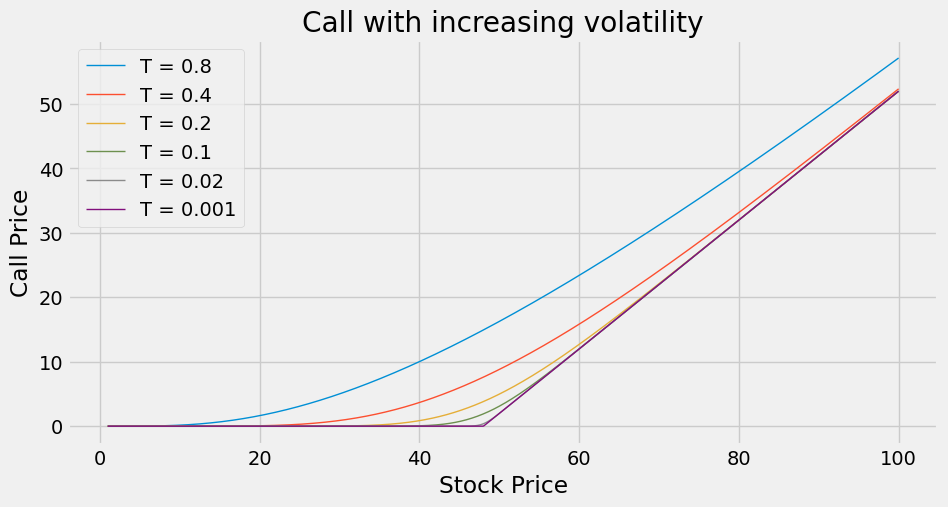

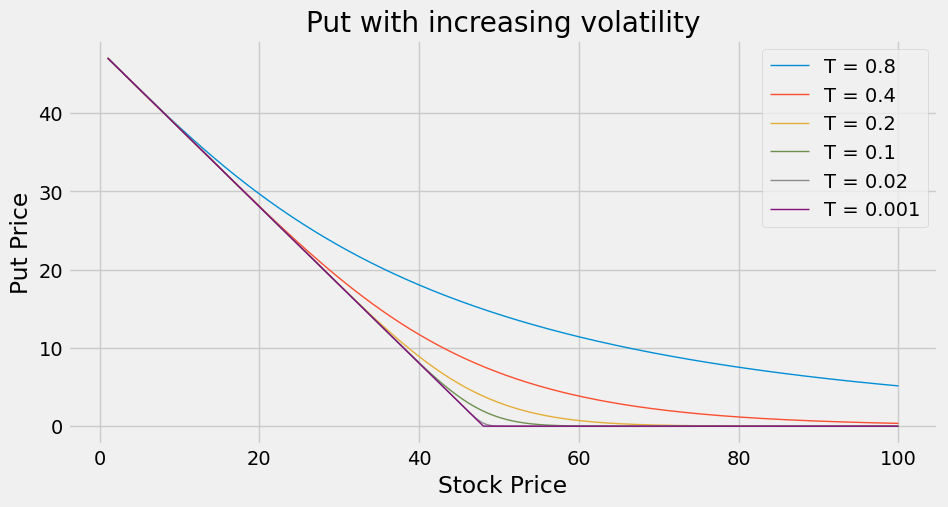

In [4]:
Vol = np.array([0.8,0.4,0.2,0.1,0.02,0.001])

# Plot the call price for each of the given tenors
plt.figure(figsize=(10,5))
plt.title('Call with increasing volatility')
plt.xlabel('Stock Price') 
plt.ylabel('Call Price')
for v in Vol:
    plt.plot(x_axis, bs.call_price(x_axis,K,T,v,r), label="T = {}".format(v), linewidth=1)
plt.legend()
plt.show()

# Plot the put price for each of the given tenors
plt.figure(figsize=(10,5))
plt.title('Put with increasing volatility')
plt.xlabel('Stock Price')
plt.ylabel('Put Price') 
for v in Vol:
    plt.plot(x_axis, bs.put_price(x_axis,K,T,v,r), label="T = {}".format(v), linewidth=1)
plt.legend()
plt.show()

### What happends when r changes?

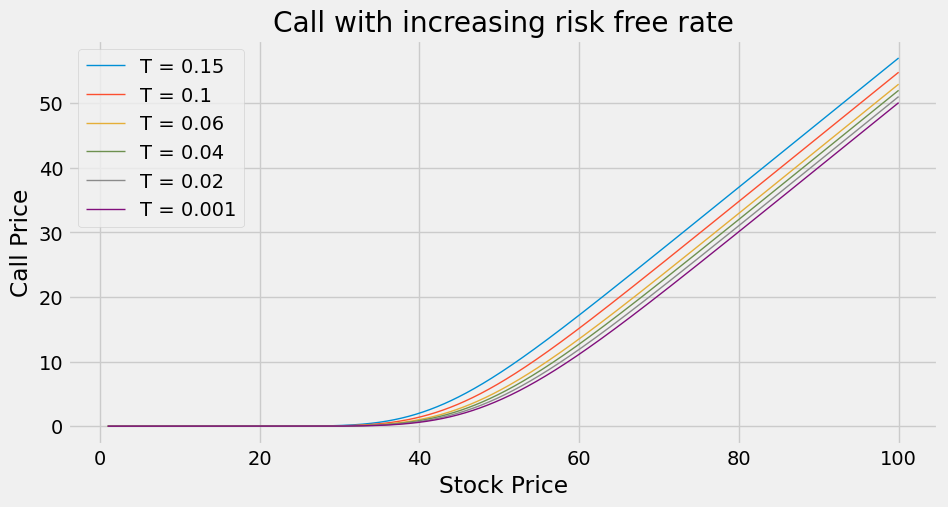

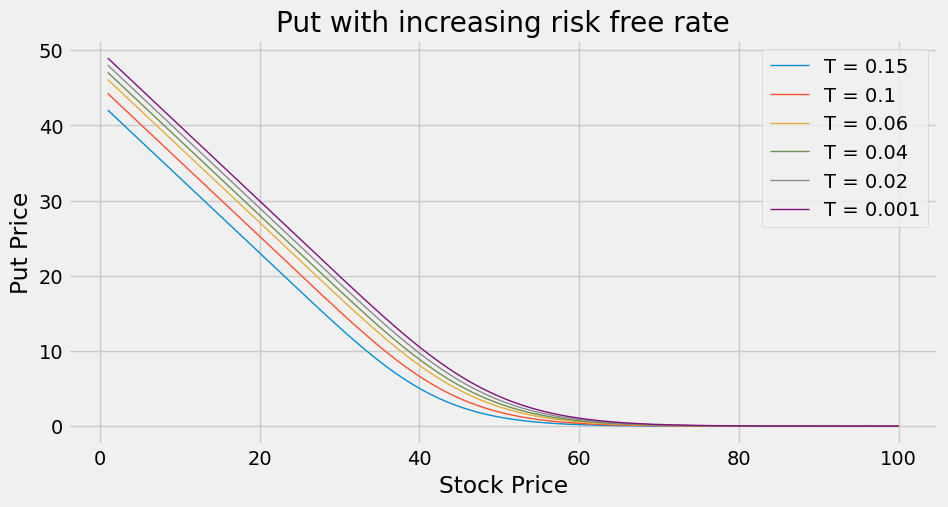

In [5]:
Rates = np.array([0.15,0.1,0.06,0.04,0.02,0.001])

# Plot the call price for each of the given tenors
plt.figure(figsize=(10,5))
plt.title('Call with increasing risk free rate')
plt.xlabel('Stock Price') 
plt.ylabel('Call Price')
for rate in Rates:
    plt.plot(x_axis, bs.call_price(x_axis,K,T,vol,rate), label="T = {}".format(rate), linewidth=1)
plt.legend()
plt.show()

# Plot the put price for each of the given tenors
plt.figure(figsize=(10,5))
plt.title('Put with increasing risk free rate')
plt.xlabel('Stock Price')
plt.ylabel('Put Price') 
for rate in Rates:
    plt.plot(x_axis, bs.put_price(x_axis,K,T,vol,rate), label="T = {}".format(rate), linewidth=1)
plt.legend()
plt.show()

## Section 2: Greeks

### What influences Gamma $\gamma$?

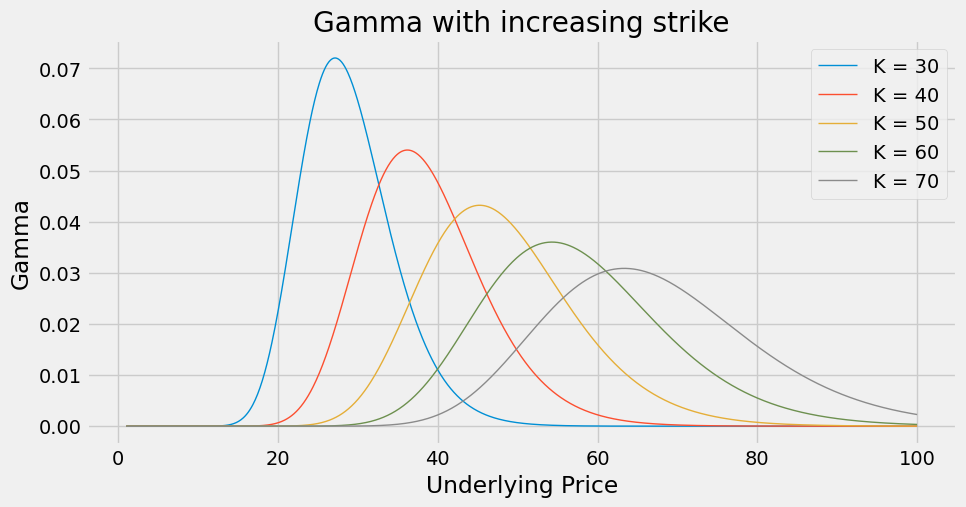

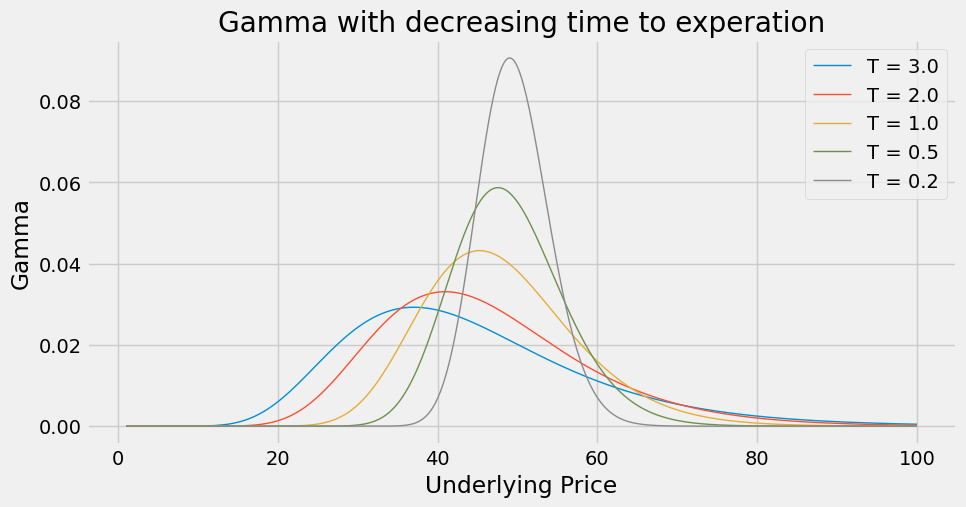

In [6]:
Strikes = np.array([30,40,50,60,70])

# Plot the call price for each of the given tenors
plt.figure(figsize=(10,5))
plt.title('Gamma with increasing strike')
plt.xlabel('Underlying Price') 
plt.ylabel('Gamma')
for strike in Strikes:
    plt.plot(x_axis, bs.gamma(x_axis,strike,T,vol,r), label="K = {}".format(strike), linewidth=1)
plt.legend()
plt.show()

Tenors = np.array([3,2,1,0.5,0.2])

# Plot the call price for each of the given tenors
plt.figure(figsize=(10,5))
plt.title('Gamma with decreasing time to experation')
plt.xlabel('Underlying Price') 
plt.ylabel('Gamma')
for t in Tenors:
    plt.plot(x_axis, bs.gamma(x_axis,K,t,vol,r), label="T = {}".format(t), linewidth=1)
plt.legend()
plt.show()

We can make a few observations:
- For a particular option, gamma is maximized when $S \approx K$..
- Gamma increases when $T \to 0$, especially when the $S \approx K$.
- When $K$ gets small, gamma has the potential to be larger than if $K$ were large.

### What influences Vega?

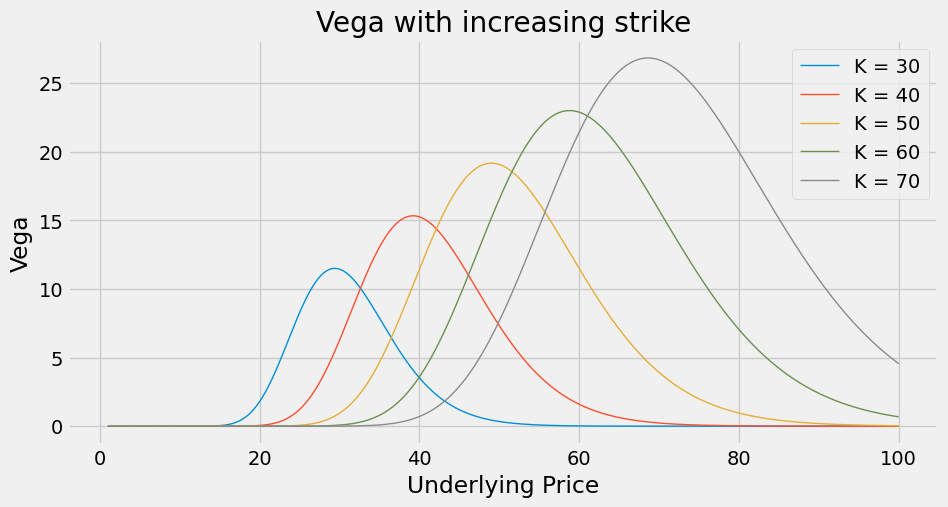

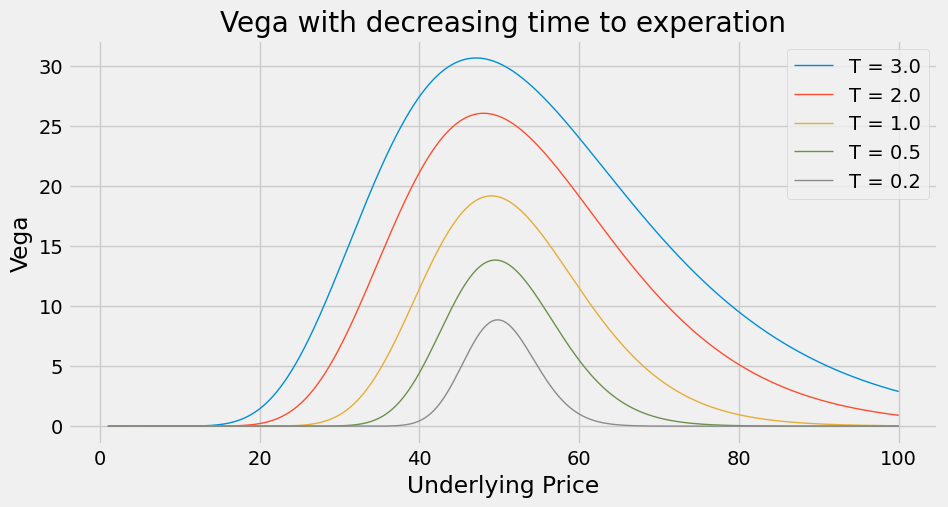

In [7]:
Strikes = np.array([30,40,50,60,70])

# Plot the call price for each of the given tenors
plt.figure(figsize=(10,5))
plt.title('Vega with increasing strike')
plt.xlabel('Underlying Price') 
plt.ylabel('Vega')
for strike in Strikes:
    plt.plot(x_axis, bs.vega(x_axis,strike,T,vol,r), label="K = {}".format(strike), linewidth=1)
plt.legend()
plt.show()

Tenors = np.array([3,2,1,0.5,0.2])

# Plot the call price for each of the given tenors
plt.figure(figsize=(10,5))
plt.title('Vega with decreasing time to experation')
plt.xlabel('Underlying Price') 
plt.ylabel('Vega')
for t in Tenors:
    plt.plot(x_axis, bs.vega(x_axis,K,t,vol,r), label="T = {}".format(t), linewidth=1)
plt.legend()
plt.show()

We can make a few observations:
- Vega is maximized when $S \approx K$.
- Vega $\to 0$ when $T \to 0$.
- Vega behaves in a similar, but opposite manner to gamma.

#### Interesting relationship between vega and kappa

We see that as the strike increases, both vega and kappa peak in an almost linear fashion. This observation is particuarly useful when trying to replicate variance swaps.

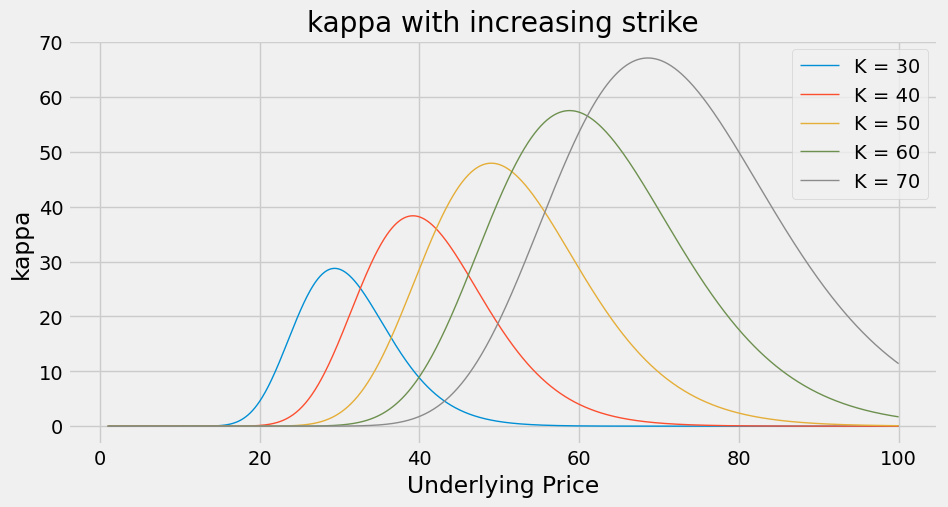

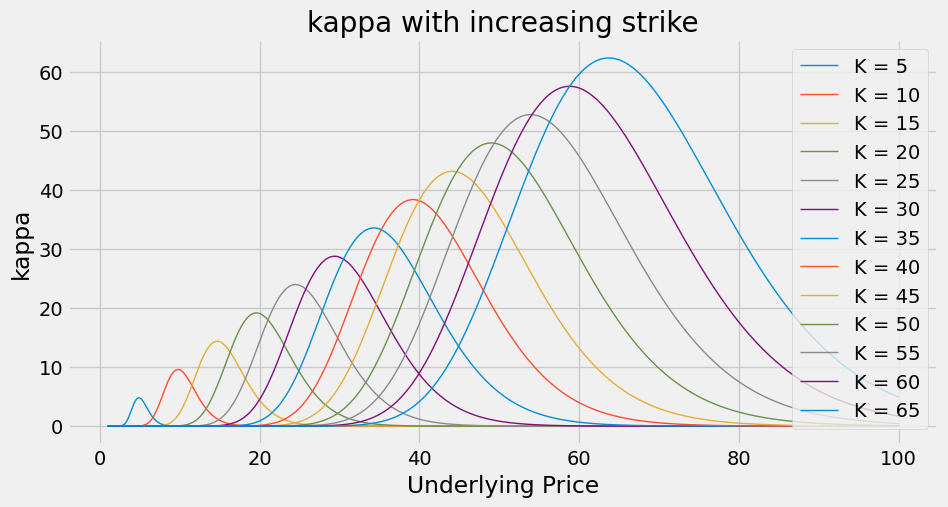

In [11]:
Strikes = np.array([30,40,50,60,70])

# Plot the call price for each of the given tenors
plt.figure(figsize=(10,5))
plt.title('kappa with increasing strike')
plt.xlabel('Underlying Price') 
plt.ylabel('kappa')
for strike in Strikes:
    plt.plot(x_axis, bs.kappa(x_axis,strike,T,vol,r), label="K = {}".format(strike), linewidth=1)
plt.legend()
plt.show()

Strikes = np.arange(5,70,5)

# Plot the call price for each of the given tenors
plt.figure(figsize=(10,5))
plt.title('kappa with increasing strike')
plt.xlabel('Underlying Price') 
plt.ylabel('kappa')
for strike in Strikes:
    plt.plot(x_axis, bs.kappa(x_axis,strike,T,vol,r), label="K = {}".format(strike), linewidth=1)
plt.legend()
plt.show()

### What influences theta $\theta$?

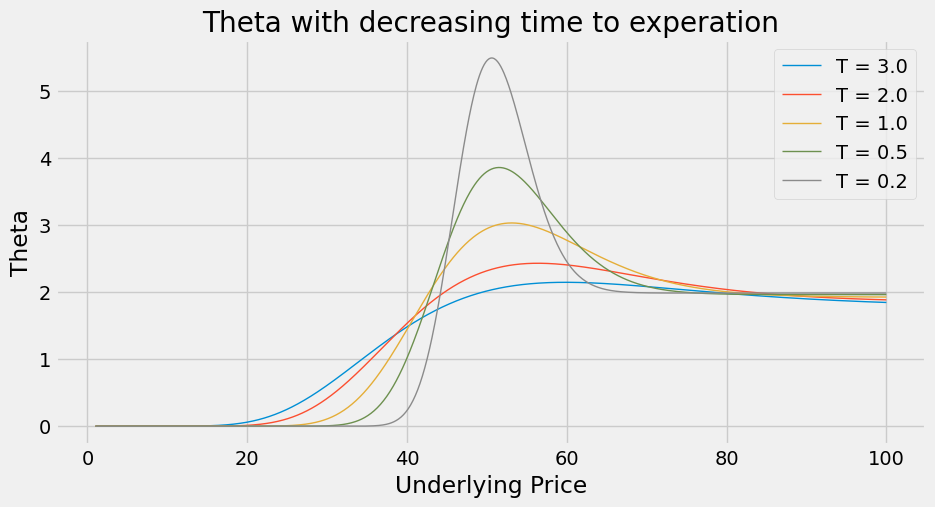

In [9]:
Tenors = np.array([3,2,1,0.5,0.2])

# Plot the call price for each of the given tenors
plt.figure(figsize=(10,5))
plt.title('Theta with decreasing time to experation')
plt.xlabel('Underlying Price') 
plt.ylabel('Theta')
for t in Tenors:
    plt.plot(x_axis, bs.theta_call(x_axis,K,t,vol,r), label="T = {}".format(t), linewidth=1)
plt.legend()
plt.show()
